# Project Overview

The research question I have selected for this project is whether sending a text message to patients before their appointment will increase the likelihood that they keep their scheduled appointment. This question is relevant within the context of medical clinics, as improving appointment attendance can lead to more efficient use of resources and better patient outcomes. 

By exploring the relationship between text message reminders and appointment attendance, the project can provide valuable insights that can inform patient outreach and appointment scheduling strategies. The significance of this research lies in its potential to improve the quality of healthcare delivery and increase the efficiency of medical clinics.


## Context

I have selected this topic for analysis due to my previous experience as a licensed vocational nurse. I worked in a public health clinic for the Department of Health Services in Los Angeles County. Non-attendance at appointments poses challenges for both patients and providers. 

For patients, missed appointments result in a delay in care and can escalate preventable illnesses to higher levels of care, such as Urgent Care or the Emergency room, resulting in increased costs. 

At the clinic where I worked, appointments were frequently booked out three months in advance, leading to further delays in care if an appointment was missed.

From the provider's perspective, appointments are usually scheduled back-to-back to maximize the provider's time. A missed appointment means lost time that could have been used to treat another patient. This time cannot be recovered. 

Patients who have missed appointments frequently run over their allotted time during their rescheduled appointments, causing delays for the provider and other patients. To prevent scheduling gaps due to missed appointments, schedulers often overbook appointments. This can lead to issues when all patients attend their scheduled appointments, as the provider may have to shorten appointments, run late, or miss lunch.

Therefore, it is in our best interest to prevent missed appointments whenever possible, rather than just compensate for them. The prediction of the rate of missed appointments could help inform the extent to which appointments could be double-booked. I am particularly interested in exploring whether sending text messages before appointments can reduce the number of missed appointments.



## Dataset 

https://www.kaggle.com/datasets/joniarroba/noshowappointments

## Hypothesis
The hypothesis/need identified in A1 is to determine if there is a relationship between receiving a text message reminder and reducing "no-shows" for appointments.

The null hypothesis is that there is no relationship between receiving a text message reminder and reducing "no-shows" for appointments.

The alternative hypothesis is that there is a relationship between receiving a text message reminder and reducing "no-shows" for appointments.


### Import Packages

In [321]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

### Functions

In [322]:
def dtconversion(df):
    #Changing all values of -1 in DaysBetween with 0
    df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%d')
    df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%d')
    df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
    df['DaysBetween'] = df['DaysBetween'].clip(lower=0)
    return df.head()




In [323]:
def noshowchart(df):
    
    # Set the main color
    main_color = sns.color_palette('bwr')
    sns.set_palette(main_color)

    # Plot the count of patients who showed up or didn't show up based on whether they received a text message or not
    sns.countplot(x='NoShow', hue='TextReceived', data=df)

    # Add titles for x and y axis
    plt.xlabel('Was the patient a No Show?')
    plt.ylabel('Count')

    # Change the labels for the legend
    plt.legend(labels=['Text Not Received', 'Text Received'])

    # Replace 0 and 1 with 'Showed' and 'No Show'
    plt.xticks([0,1], ['Showed', 'No Show'])

    # Show the plot
    plt.show()

## Data Wrangling
<br>

    

### Importing Data Set<br>

In [324]:
#Importing dataset from kaggle and opening in pandas

df = pd.read_csv("KaggleV2-May-2016.csv")

In [325]:
#Inspecting first 5 rows to ensure the dataframe was created correctly
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [326]:
#Inspecting Columsns and shape of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [327]:
#Summarize statistics of DataFrame columns
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [328]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [329]:
#Checking for unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [330]:
#Since AppointmentID will be our PK I am checking to see if there are any duplicate values
df['AppointmentID'].duplicated().sum()

0

In [331]:
#Checking for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

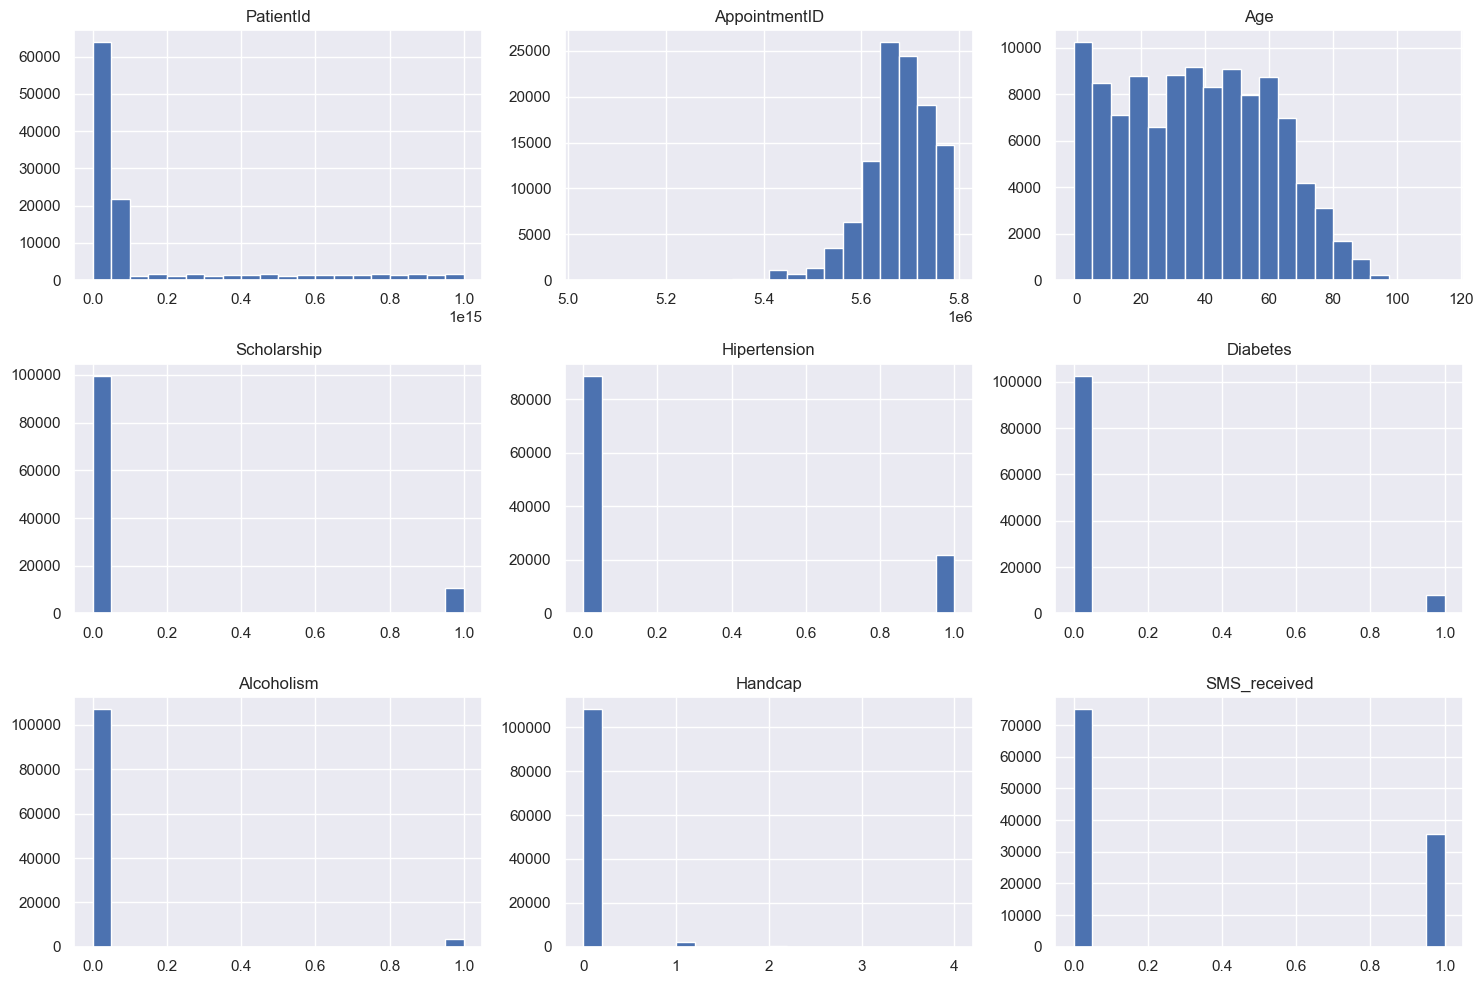

In [332]:
df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()


## Data Cleaning <br>

#### ScheduledDay and AppointmentDay columns are in object format that needs too be converted to datetime

In [333]:
#Convert to datetime
#Create DaysBetween column
#Remove negative values from DaysBetween column

dtconversion(df)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [334]:
(df['DaysBetween'] < 0).sum()

0

In [335]:
#Verify that the datatype has been changed to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

#### Deal with Outliers in Age

In [336]:
# Find the rows with age greater than 100
outliers_above_100 = df[df['Age'] > 100]

# Find the rows with age less than 0
outliers_below_0 = df[df['Age'] < 0]

# Combine the two datasets if needed
outliers_age = pd.concat([outliers_above_100, outliers_below_0])


In [337]:
outliers_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No,0
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,2
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,2
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,37
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No,0
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No,1
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No,14
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,0


In [338]:
outliers_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 58014 to 99832
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       8 non-null      float64            
 1   AppointmentID   8 non-null      int64              
 2   Gender          8 non-null      object             
 3   ScheduledDay    8 non-null      datetime64[ns, UTC]
 4   AppointmentDay  8 non-null      datetime64[ns, UTC]
 5   Age             8 non-null      int64              
 6   Neighbourhood   8 non-null      object             
 7   Scholarship     8 non-null      int64              
 8   Hipertension    8 non-null      int64              
 9   Diabetes        8 non-null      int64              
 10  Alcoholism      8 non-null      int64              
 11  Handcap         8 non-null      int64              
 12  SMS_received    8 non-null      int64              
 13  No-show         8 non-null     

In [339]:
# Calculate the mean of age column
mean_age = df["Age"].mean()

# Replace the ages less than zero and greater than or equal to 115 with the mean_age
df['Age'] = df['Age'].where((df['Age'] > 0) & (df['Age'] < 115), mean_age)


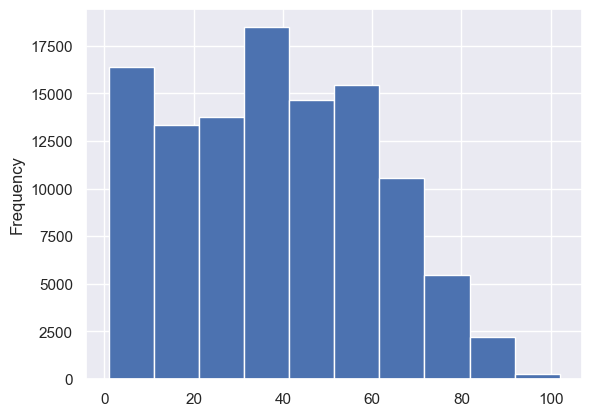

In [340]:
# Visualize a histogram of the "Age" column
import matplotlib.pyplot as plt
df['Age'].plot.hist()
plt.show()

#### For the No Show column a no show (missed appointment) is represented as a Yes or No. I need to change this to binary in order to run calculations later on

In [341]:
# Replace No-show values
df['No-show'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [342]:
df['No-show'].sample(10)

23969    1
26613    0
8980     0
6847     0
76905    0
15993    0
20835    0
43675    1
77271    0
56973    0
Name: No-show, dtype: int64

In [343]:
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [344]:
# list of columns to be removed
cols_to_remove = ['PatientId', 'AppointmentID', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

# remove the columns
df.drop(columns=cols_to_remove, inplace=True)



In [345]:
df.rename(columns={'SMS_received': 'TextReceived', 'No-show': 'NoShow'}, inplace=True)


In [346]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'TextReceived',
       'NoShow', 'DaysBetween'],
      dtype='object')

In [347]:
#Save cleaned dataframe as no_show_cleaned.csv
df.to_csv("no_show_cleaned.csv", index=False)


## Exploratory Data Analysis


In [348]:
#Reopen cleaned file as a new dataframe
clean = pd.read_csv("no_show_cleaned.csv")


In [349]:
clean.sample(5)

,Gender,ScheduledDay,AppointmentDay,Age,TextReceived,NoShow,DaysBetween
49546,F,2016-04-11 14:40:02+00:00,2016-05-09 00:00:00+00:00,37.088874,0,0,27
73014,M,2016-05-13 08:10:36+00:00,2016-05-30 00:00:00+00:00,24.000000,1,0,16
45053,M,2016-04-28 08:44:59+00:00,2016-05-11 00:00:00+00:00,61.000000,1,0,12
70483,M,2016-05-09 15:29:13+00:00,2016-05-09 00:00:00+00:00,37.088874,0,0,0
73055,F,2016-05-06 08:24:17+00:00,2016-05-11 00:00:00+00:00,8.000000,1,0,4


In [350]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Gender          110527 non-null  object 
 1   ScheduledDay    110527 non-null  object 
 2   AppointmentDay  110527 non-null  object 
 3   Age             110527 non-null  float64
 4   TextReceived    110527 non-null  int64  
 5   NoShow          110527 non-null  int64  
 6   DaysBetween     110527 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.9+ MB


I noticed my dataset lost it's datetime formatting when it was saved and reopened so I am re-encoding the datetime conversion and then recalculating the 

In [351]:
dtconversion(clean)


,Gender,ScheduledDay,AppointmentDay,Age,TextReceived,NoShow,DaysBetween
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,0,0,0


In [352]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  float64            
 4   TextReceived    110527 non-null  int64              
 5   NoShow          110527 non-null  int64              
 6   DaysBetween     110527 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(3), object(1)
memory usage: 5.9+ MB


In [353]:
(clean['DaysBetween'] < 0).sum()

0

In [354]:
clean.describe()

,Age,TextReceived,NoShow,DaysBetween
count,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.273255,0.321026,0.201933,9.532739
std,22.098538,0.466873,0.401444,15.027729
min,1.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,3.000000
75%,55.000000,1.000000,0.000000,14.000000
max,102.000000,1.000000,1.000000,178.000000


In [355]:
clean.sample(5)

,Gender,ScheduledDay,AppointmentDay,Age,TextReceived,NoShow,DaysBetween
103869,F,2016-05-13 07:44:40+00:00,2016-06-06 00:00:00+00:00,4.000000,1,0,23
13678,F,2016-05-10 15:26:20+00:00,2016-05-10 00:00:00+00:00,37.088874,0,1,0
44741,M,2016-04-28 13:05:07+00:00,2016-05-17 00:00:00+00:00,1.000000,0,0,18
68810,F,2016-05-17 10:28:38+00:00,2016-05-17 00:00:00+00:00,40.000000,0,0,0
70308,M,2016-04-28 18:04:32+00:00,2016-05-04 00:00:00+00:00,30.000000,1,0,5


#### General Overview of patient demographics

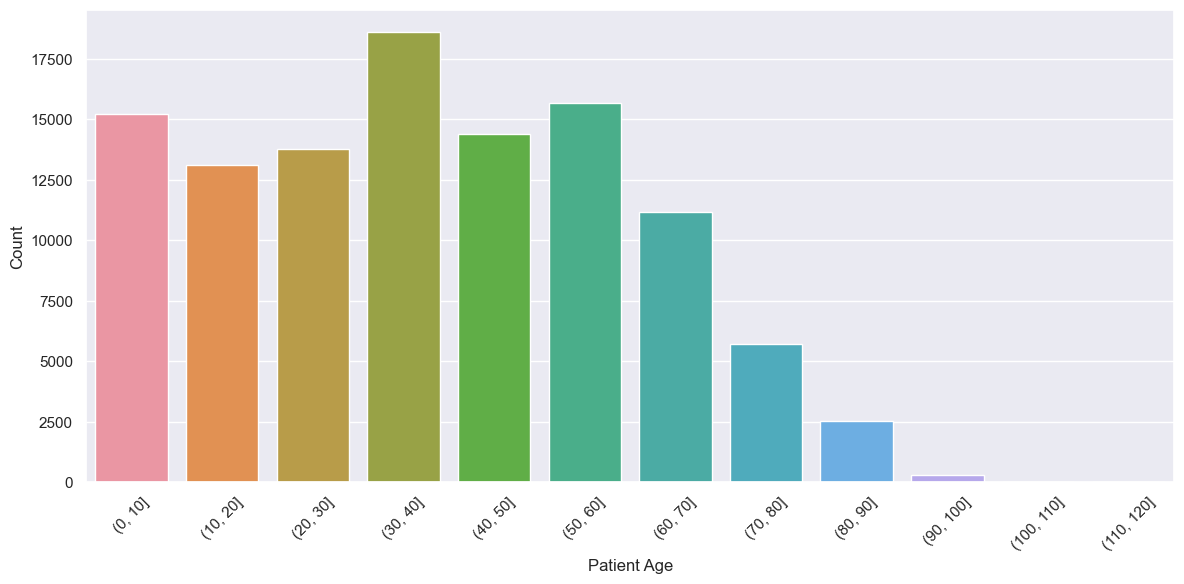

In [356]:
# Create bins for the ages
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

# Cut the ages into the bins and create a new column for the age bins
clean['Age Bin'] = pd.cut(clean['Age'], bins)

# Plot the age distribution using a barchart
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Bin', data=clean)
plt.xticks(rotation=45)
plt.tight_layout()

# Add x-axis title
plt.xlabel('Patient Age')

# Add y-axis title
plt.ylabel('Count')

# Show the plot
plt.show()



#### Investigating factors that affect no shows

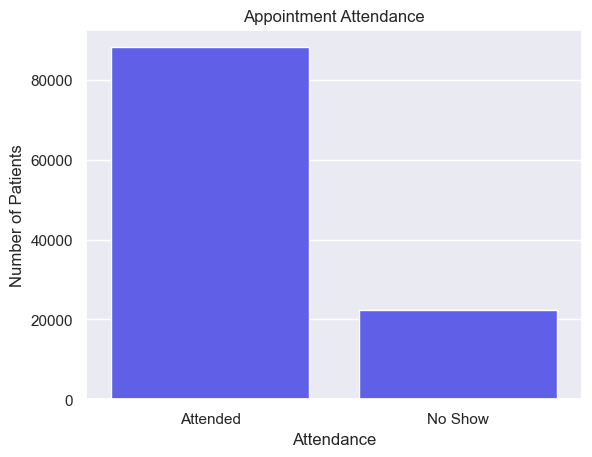

In [357]:
#Setting color palette
main_color = sns.color_palette('bwr')[0]

#Creating bar chart using no_show column
sns.countplot(data = clean, x = 'NoShow', color = main_color)
plt.title('Appointment Attendance')
plt.xticks([0, 1], ['Attended', 'No Show'])
plt.xlabel('Attendance')
plt.ylabel('Number of Patients');

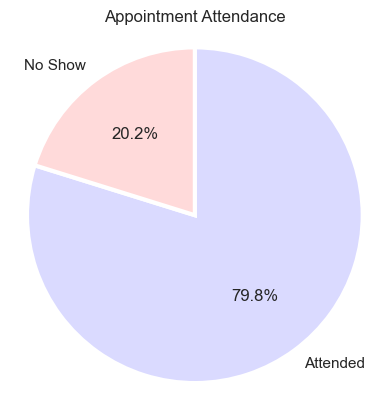

In [358]:
attendance_counts = clean.NoShow.value_counts()

colors = sns.color_palette('bwr')

plt.pie(attendance_counts, labels = ['Attended', 'No Show'], startangle = 90,
        counterclock = False, colors=[colors[2], colors[3]], autopct='%1.1f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

plt.axis('square')
plt.title('Appointment Attendance');


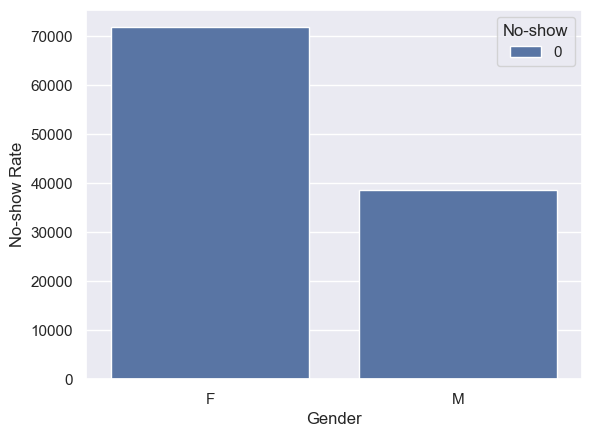

In [359]:
# Create a new column indicating whether the appointment was a no-show (1) or not (0)
clean['No-show'] = (clean['NoShow'] == 'Yes').astype(int)

# Group the data by gender and calculate the mean of the No-show column
no_show_gender = clean.groupby('Gender')['NoShow'].mean()

# Set the main color
main_color = sns.color_palette('bwr')[0]

# Plot the no-show rate by gender
sns.countplot(x='Gender', hue='No-show', data=clean)

# Add titles for x and y axis
plt.xlabel('Gender')
plt.ylabel('No-show Rate')

# Show the plot
plt.show()


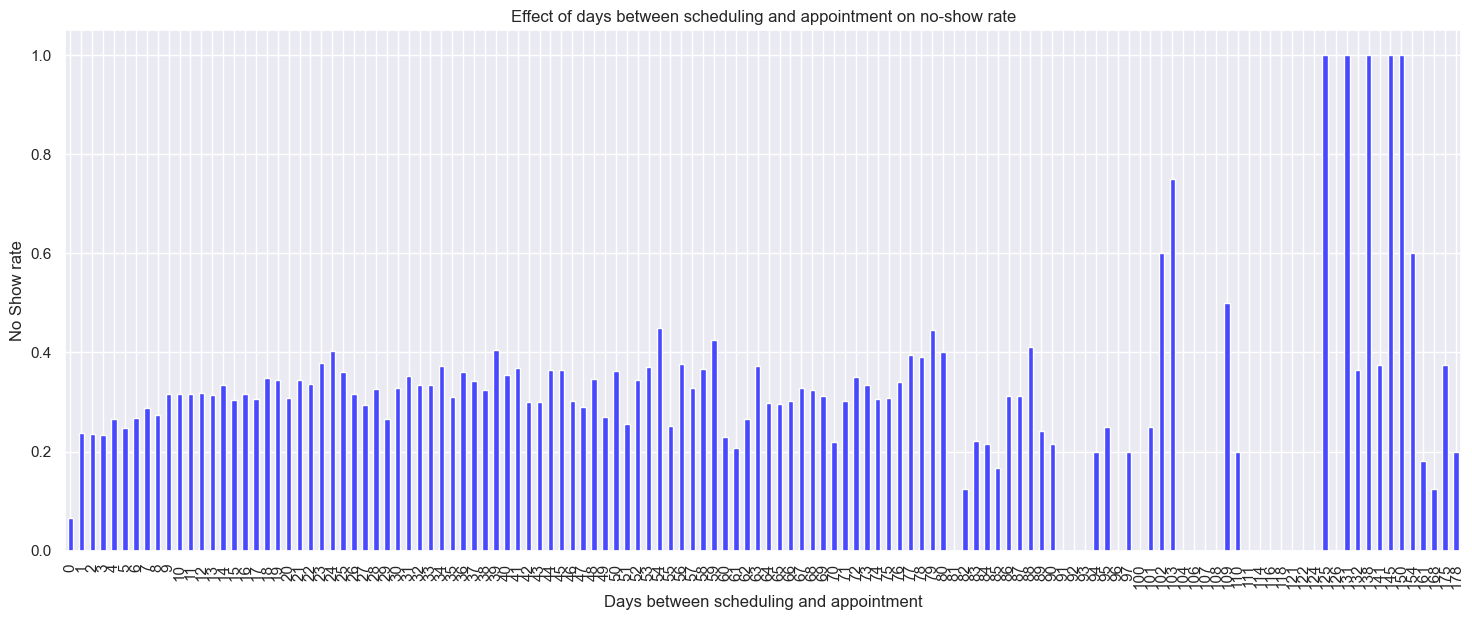

In [360]:
# Set the main color
main_color = sns.color_palette('bwr')
sns.set_palette(main_color)

# group by DaysBetween and calculate the mean of No Show 
grouped = clean.groupby('DaysBetween')['NoShow'].mean()

plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.tight_layout()

# plot the result
grouped.plot(kind='bar', figsize=(15,6),color=main_color[0])
plt.xlabel('Days between scheduling and appointment')
plt.ylabel('No Show rate')
plt.title('Effect of days between scheduling and appointment on no-show rate')
plt.show()





While there is a clear increase in the no show rate when appointments are made more than 90 days out it's hard to see a clear trend from this chart. I will create bins to see if there is a clearer trend to be seen.

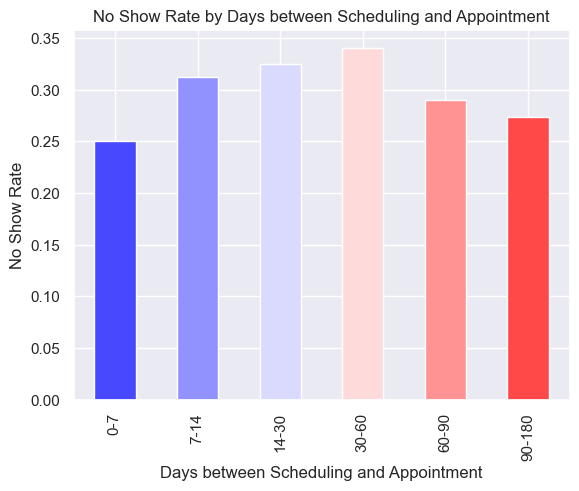

In [361]:
# Set the main color
main_color = sns.color_palette('bwr')
sns.set_palette(main_color)


bins = [0, 7, 14, 30, 60, 90, 180]
labels = ['0-7', '7-14', '14-30', '30-60', '60-90', '90-180']
df['DaysBetweenBin'] = pd.cut(df['DaysBetween'], bins=bins, labels=labels)

no_show_grouped = df.groupby('DaysBetweenBin')['NoShow'].mean()
no_show_grouped.plot(kind='bar', color=main_color)
plt.xlabel('Days between Scheduling and Appointment')
plt.ylabel('No Show Rate')
plt.title('No Show Rate by Days between Scheduling and Appointment')
plt.show()


    

In [362]:
# Filter the data by no-show and attendance
noshowed = clean['NoShow'] == 'Yes'
attended = clean['NoShow'] == 'No'


In [363]:
#Creating masks for text received
textreceived = clean['TextReceived'] == True
notext = clean['TextReceived'] == False

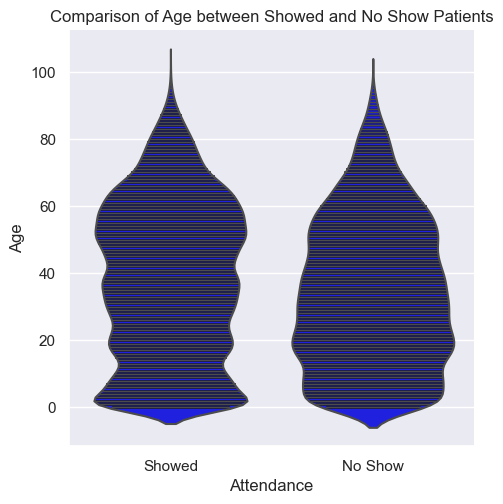

In [216]:
# Set the main color
main_color = sns.color_palette('bwr')
sns.set_palette(main_color)

# Plot the no-show rate by age
g = sns.catplot(x='NoShow', y='Age', data=clean, kind='violin', color='blue', inner='stick')

g.set(xticklabels=["Showed", "No Show"])

plt.title("Comparison of Age between Showed and No Show Patients")

# Add titles for x and y axis
plt.xlabel('Attendance')
plt.ylabel('Age')

# Show the plot
plt.show()


## Does receiving a text effect whether a patient shows up for their appointment or not. 

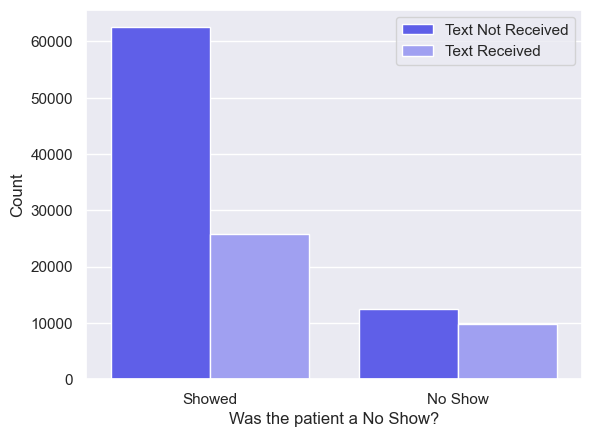

In [364]:
#Create chart showing no shows using the clean dataset and a previously defined function.
noshowchart(clean)

I noticed when I was calculating the days between scheduling day and appointment day that many of the entries had a value of 0 or -1 days in between scheduling an appointment and
attending an appointment. The -1 values were because all the values in the appointment day column was for midnight the day of the appointment while the scheduling day column had the exact
date time when it was scheduled.

Because there appeared to be many same day and next day appointments it made me wonder if those patients even had time to receive a text message since typically with most medical practices texts are sent out 24hrs prior to an appointment. This means that patients that made a same day appointment probably are skewing the results for attending their appointment without a text message. Also additionally patients who make a same day appointment are probably very motivated to attend their appointment.

Because of this I'm going to create a second dataframe excluding rows wheres days between scheduling day and appointment day are 0 and then repeat the same visualizations. I also will create a dataset that only contains same day appointments 



In [365]:
clean_exclude_sameday = clean[clean.DaysBetween != 0]
clean_sameday_only = clean[clean.DaysBetween == 0]

In [366]:
#Verifying the subdivision was created correctly.
clean_exclude_sameday.sample(5)

,Gender,ScheduledDay,AppointmentDay,Age,TextReceived,NoShow,DaysBetween,Age Bin,No-show
106338,F,2016-05-31 07:17:04+00:00,2016-06-02 00:00:00+00:00,29.0,0,0,1,"(20, 30]",0
91755,F,2016-05-24 08:14:16+00:00,2016-06-07 00:00:00+00:00,47.0,1,1,13,"(40, 50]",0
96861,F,2016-06-02 08:50:11+00:00,2016-06-08 00:00:00+00:00,42.0,0,0,5,"(40, 50]",0
14613,M,2016-03-31 15:32:18+00:00,2016-05-06 00:00:00+00:00,44.0,1,0,35,"(40, 50]",0
63547,F,2016-04-26 15:34:51+00:00,2016-05-18 00:00:00+00:00,42.0,0,1,21,"(40, 50]",0


In [367]:
clean_sameday_only.sample(5)

,Gender,ScheduledDay,AppointmentDay,Age,TextReceived,NoShow,DaysBetween,Age Bin,No-show
35706,F,2016-05-17 10:22:02+00:00,2016-05-18 00:00:00+00:00,46.0,0,1,0,"(40, 50]",0
91018,M,2016-06-08 08:01:12+00:00,2016-06-08 00:00:00+00:00,46.0,0,0,0,"(40, 50]",0
5775,F,2016-05-30 10:34:36+00:00,2016-05-30 00:00:00+00:00,29.0,0,0,0,"(20, 30]",0
86181,M,2016-06-03 07:53:03+00:00,2016-06-03 00:00:00+00:00,60.0,0,0,0,"(50, 60]",0
93506,F,2016-06-06 14:16:18+00:00,2016-06-06 00:00:00+00:00,58.0,0,0,0,"(50, 60]",0


In [368]:
clean_exclude_sameday.shape

(66746, 9)

In [369]:
#Calculating what proportion of the dataset does non sameday appointments make up
clean_exclude_sameday.shape[0] / clean.shape[0] * 100

60.388864259411726

In [370]:
clean_sameday_only.shape

(43781, 9)

In [371]:
#Calculating what proportion of the dataset does non sameday appointments make up
clean_sameday_only .shape[0] / clean.shape[0] * 100

39.611135740588274

So we can see from these proportions that same day appointments make up nearly 40% of the all appointments made. This has the potential to skew the analysis as to whether text messages are helpful for reducing no shows if my assumption is correct that same day appointments do not receive text message reminders because it's already past the point where they would have been sent and that patients who have made sameday appointments are motivated to attend their appointment and have also had contact with a staff member at the clinic which would replace the purpose of a text.

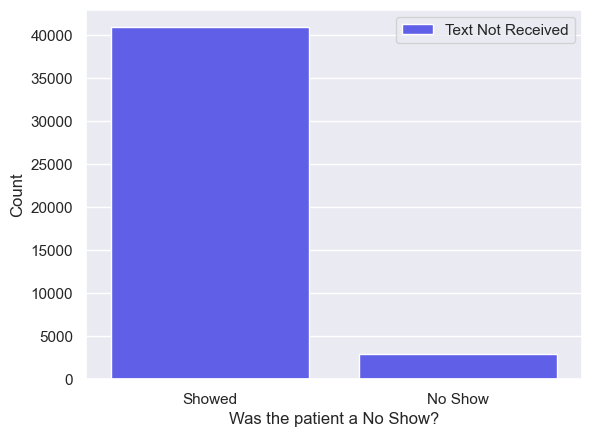

In [372]:
#Create chart showing no shows using the clean_sameday_only dataset and a previously defined function.
noshowchart(clean_sameday_only)

So now I've subdivided the data set into same day and non same day appointments I can see that none of the appointments booked same day received text messages which confirms my suspicions that same day appointments do not receive text messgaes because the text messages are sent out some time prior to the day of the appointment. Because same day appointments make up a very high volume of the total number of appointments and they have a very low rate of no shows their inclusion in this analysis will skew the results and obscure the insights we are trying to make. I feel confident at this point to exclude same day appointments from my analysis but I will make a note of it in my report. 

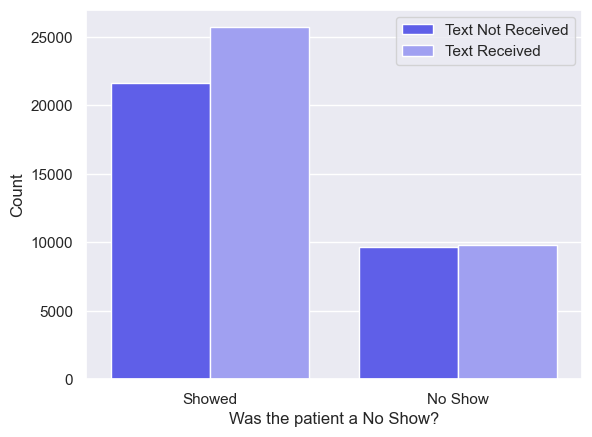

In [373]:
#Create chart showing no shows using the clean_exclude_sameday dataset and a previously defined function.
noshowchart(clean_exclude_sameday)

When the dataset that excludes the same day appointments is recharted we can see that text messages do have an affect on reducing patients not showing up for their appointment.

# Summary Statistics

In [374]:
clean_exclude_sameday.describe()

,Age,TextReceived,NoShow,DaysBetween,No-show
count,66746.000000,66746.000000,66746.000000,66746.000000,66746.0
mean,39.468033,0.531597,0.290789,15.785590,0.0
std,21.871246,0.499004,0.454130,16.590956,0.0
min,1.000000,0.000000,0.000000,1.000000,0.0
25%,22.000000,0.000000,0.000000,4.000000,0.0
50%,39.000000,1.000000,0.000000,11.000000,0.0
75%,56.000000,1.000000,1.000000,23.000000,0.0
max,102.000000,1.000000,1.000000,178.000000,0.0


We can see from the summary statistics that the average age was 38.39, ~53% of patients received a text prior to their appointment and there was an overall no show rate of ~29% The average number of days between appointments was 15.79 days with a minimum of 1 day and a maximum of 178 days. The average age is a little higher than the average age in the entire dataset which was 37.09. The text received rate was higher than the overall dataset which had only 32% of patients receiving texts. The no show rate is also higher than the 20% from the overall dataset. The average days in between is higher than the average in the overall dataset which was 9.5. This does suggest that the inclusion of same day appointments was skewing some of the data regarding these three metrics while the average age stays about the same. 


# Binary Logistic Regression

The null hypothesis is that there is no relationship between receiving a text message reminder and reducing "no-shows" for appointments.<BR>
    
The alternative hypothesis is that there is a relationship between receiving a text message reminder and reducing "no-shows" for appointments.<BR>
    
   $$
H_0 : p_{new} - p_{old} \leq 0 \\
H_1 : p_{new} - p_{old} > 0
$$


It is assumed that there is no relationship between receiving a text message reminder and reducing no shows if the Type 1 error rate is 5% or higher


In [231]:
clean_exclude_sameday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66746 entries, 5 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          66746 non-null  object             
 1   ScheduledDay    66746 non-null  datetime64[ns, UTC]
 2   AppointmentDay  66746 non-null  datetime64[ns, UTC]
 3   Age             66746 non-null  float64            
 4   TextReceived    66746 non-null  int64              
 5   NoShow          66746 non-null  int64              
 6   DaysBetween     66746 non-null  int64              
 7   Age Bin         64800 non-null  category           
 8   No-show         66746 non-null  int32              
dtypes: category(1), datetime64[ns, UTC](2), float64(1), int32(1), int64(3), object(1)
memory usage: 4.4+ MB


In [375]:
# Fit the logistic regression model
model = sm.Logit(clean_exclude_sameday["NoShow"], clean_exclude_sameday[["TextReceived"]])
result = model.fit()

# Get the summary of the model
print(result.summary())

# Calculate the odds ratio
odds_ratio = np.exp(result.params)
print("Odds ratio: ", odds_ratio)


Optimization terminated successfully.
         Current function value: 0.637724
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 NoShow   No. Observations:                66746
Model:                          Logit   Df Residuals:                    66745
Method:                           MLE   Df Model:                            0
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                -0.05784
Time:                        11:03:06   Log-Likelihood:                -42566.
converged:                       True   LL-Null:                       -40238.
Covariance Type:            nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TextReceived    -0.9657      0.012    -81.289      0.000      -0.989      -0.942
Odds ratio:  TextReceiv

The coefficient of the independent variable (TextReceived) is -0.9657, with a standard error of 0.012. This means that the odds of a patient not showing up to their appointment decreases by 0.38 times if they received a text message reminder (the odds ratio is calculated as 1 / (e^-0.9657)).

The z-score of -81.289 for the coefficient, and the resulting p-value of 0.000, suggest that the relationship between receiving a text message reminder and not showing up to the appointment is statistically significant (p < 0.05), and that it is unlikely that this relationship is due to chance.

Therefore, you can conclude that there is evidence to support the alternative hypothesis, which states that there is a relationship between receiving a text message reminder and reducing "no-shows" for appointments.

In [376]:

# Define the response variable as 'No Show' and the predictor as 'TextReceived'
y = clean_exclude_sameday['NoShow']
X = clean_exclude_sameday[['TextReceived']]

# Add a constant to the predictor variables
X = sm.add_constant(X)

# Fit the binary logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print the summary of the model
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.602235
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 NoShow   No. Observations:                66746
Model:                          Logit   Df Residuals:                    66744
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                0.001032
Time:                        11:03:09   Log-Likelihood:                -40197.
converged:                       True   LL-Null:                       -40238.
Covariance Type:            nonrobust   LLR p-value:                 8.027e-20
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8101      0.012    -66.123      0.000      -0.834      -0.786
TextReceived    -0.1555

The results from this second set of code show the effect of the binary predictor (TextReceived) on the binary response (No Show). The results indicate that:

- The coefficients of the predictor (TextReceived) and the constant are significant in the logistic regression model, with a p-value of less than 0.05. This suggests that the predictor has a significant effect on the response.

- The coefficient for the predictor (TextReceived) is -0.1555, with a standard error of 0.017. This suggests that for every unit increase in the value of TextReceived, the log odds of No Show decrease by 0.1555.

- The odds ratio for TextReceived is calculated by exponentiating the coefficient, and it is 0.8575. This means that, holding all other variables constant, the odds of No Show are 0.8575 times lower for individuals who received a text message reminder compared to those who did not receive a reminder.

Based on the second logistic regression test, there is a significant effect of text messages on no-shows. The coefficient for "TextReceived" is -0.1555, with a p-value of 0.000, which suggests that receiving text messages is negatively associated with the likelihood of a no-show. This means that patients who receive text messages are less likely to miss their appointments compared to those who do not receive text messages.

- The first test was a binary logistic regression model with only the "TextReceived" variable. 
- The second test was a binary logistic regression model with an added constant (intercept) and both "const" and "TextReceived" variables. The second model is more comprehensive and allows for the analysis of the effect of both the constant and the "TextReceived" variable on the probability of the response variable, "No Show".